## Problem Set 3 (Part 1 of 2): Interacting with the Alpha Vantage API using Python libraries

As automation and algorithms continue to disrupt the investment managmentment business, it is important to know how to access finacial data that is realtime and interactive. In this problem set we will access the Alpha Vantage API to build datasets of recent stock performance. Alpha Vantage is a provider of free APIs for realtime and historical data on stocks, forex, and cryptocurrencies.

This part of the exercise demonstrates:

1. Setting up a programming environment to work with APIs
2. Interpreting documentation to change parameters
3. Using the 'requests' library to make HTTP requests
4. Getting data through HTTP requests
5. Using the 'alpha_vantage' library to access the API and format the data
6. Creating an Excel file from the data

Documentation links:
<br />Alpha Vantage: https://www.alphavantage.co/documentation/
<br />Alpha Vantage Python library: https://alpha-vantage.readthedocs.io/en/latest/#
<br />Requests library: https://2.python-requests.org/en/master/
<br />Pandas DataFrame: https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

______

#### Get API key

Go to https://www.alphavantage.co/support/#api-key and obtain an API key. Copy this key into the "api_key" variable in the next cell:

In [1]:
api_key = "A8O16AND47KXCXJM"

Assign a stock ticker symbol of your choosing to the 'ticker' variable:

In [2]:
ticker = "GE"

Import the appropriate libraries in the lines below each comment:

In [3]:
# pandas
import pandas as pd
# requests
import requests as rq
# alpha_vantage TimeSeries class
from alpha_vantage.timeseries import TimeSeries
# mmatplotlib.pyplot as plt
import matplotlib.pyplot as plt

#### Access API through an HTTP request

Assign the API url to the variable "link".
<br />(refer to the Alpha Vantage documention)
<br />
<br />Format the url string to include the "api_key" variable and the "ticker" variable Reassign the url u

In [6]:
# f (python 3) allows to use variables, use {} to insert variables
link = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={ticker}&interval=1min&apikey={api_key}"
# ? mark is all data that is optional for JSON to create website
print(link)

https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=GE&interval=1min&apikey=A8O16AND47KXCXJM


Refer to the requests documentation to set up a get request to the above url. Assign the output to a new variable, preferably your ticket symbol. 

In [7]:
ge = rq.get(link)

Print the HTTP response:

In [8]:
#response 200 = success, response 404 = failure
print(ge)

<Response [200]>


Print the data:

In [10]:
#.text is attribute showing data
print(ge.text)

{
    "Meta Data": {
        "1. Information": "Intraday (1min) open, high, low, close prices and volume",
        "2. Symbol": "GE",
        "3. Last Refreshed": "2019-09-23 16:00:00",
        "4. Interval": "1min",
        "5. Output Size": "Compact",
        "6. Time Zone": "US/Eastern"
    },
    "Time Series (1min)": {
        "2019-09-23 16:00:00": {
            "1. open": "9.3500",
            "2. high": "9.3600",
            "3. low": "9.3400",
            "4. close": "9.3500",
            "5. volume": "675569"
        },
        "2019-09-23 15:59:00": {
            "1. open": "9.3453",
            "2. high": "9.3591",
            "3. low": "9.3391",
            "4. close": "9.3453",
            "5. volume": "473890"
        },
        "2019-09-23 15:58:00": {
            "1. open": "9.3600",
            "2. high": "9.3600",
            "3. low": "9.3400",
            "4. close": "9.3466",
            "5. volume": "263236"
        },
        "2019-09-23 15:57:00": {
           

______

#### Access the API through the alpha_vantage libray

Create an instance of the TimeSeries class imported earlier. Assign your API key to the key argument. Use "pandas" as an output format.

In [12]:
# Cannot use pd for pandas, output format built into TimeSeries
ts = TimeSeries(key=api_key,output_format='pandas')

Use the get_intraday method to access API data. Get the last 100 observations of data for your ticker symbol at 1-minute intervals:

In [13]:
#Gives both data and meta data printed to two different variables
data, meta_data = ts.get_intraday(symbol=ticker,interval='1min', outputsize='compact')

Print the data:

In [14]:
print(data)

                     1. open  2. high  3. low  4. close  5. volume
date                                                              
2019-09-23 14:21:00   9.3256   9.3400  9.3200    9.3400   117802.0
2019-09-23 14:22:00   9.3332   9.3600  9.3332    9.3500   142322.0
2019-09-23 14:23:00   9.3553   9.3641  9.3491    9.3503   123546.0
2019-09-23 14:24:00   9.3500   9.3500  9.3400    9.3450    28309.0
2019-09-23 14:25:00   9.3500   9.3500  9.3400    9.3450    19518.0
2019-09-23 14:26:00   9.3450   9.3500  9.3400    9.3450    29511.0
2019-09-23 14:27:00   9.3500   9.3700  9.3500    9.3600    97720.0
2019-09-23 14:28:00   9.3602   9.3691  9.3591    9.3602    60155.0
2019-09-23 14:29:00   9.3500   9.3600  9.3500    9.3550    25270.0
2019-09-23 14:30:00   9.3603   9.3787  9.3587    9.3703    76001.0
2019-09-23 14:31:00   9.3670   9.3700  9.3500    9.3550   113366.0
2019-09-23 14:32:00   9.3602   9.3791  9.3591    9.3653   130526.0
2019-09-23 14:33:00   9.3600   9.3800  9.3600    9.3800   1014

Plot one column of the time series data with the ticket symbol as the title of the graph.
<br />(refer to prior problem set examples)

Text(0.5, 1.0, 'GE')

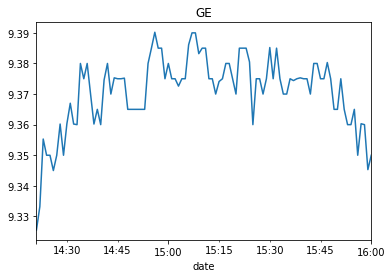

In [15]:
#data and then the column (use []), .plot plots
data['1. open'].plot()
#use plt to change things up, for example, change the title
plt.title(ticker)

______

#### Export intraday data to Excel file

Refer to the pandas.DataFrame documentation and create an Excel file that includes your time series data of your stock price:

In [17]:
#from pandas, click link above
data.to_excel("my_ge_stock_data.xlsx")

In [ ]:
# Done with part 1
#9/23